# Módulo 2 - Técnicas de Programação II
## Aula 2
- Gráficos com Pandas
- EDA (Exploratory Data Analysis)
- Exercícios

### Introdução

Gráficos são representações visuais dos dados, que buscam facilitar o entendimento dos mesmos. Podem ser muito úteis na identificação de variáveis importantes para uma modelagem ou tomada de decisão.


**Tipos de gráficos mais usuais:**
- **Scatter plot (ou gráfico de dispersão):**
Dadas duas variáveis X e Y, cada observação (par de valores (x,y)) é representado por um ponto no gráfico. Na imagem abaixo, uma observação (x,y) = (4,5) é representada pelo X vermelho.
<img src="./images/img_scatterplot_editada.png" alt="Drawing" style="width: 500px;"/>

- **Gráfico de linhas:**
O gráfico de linhas é muito utilizado quando estamos querendo encontrar tendências de um conjunto de variáveis. No geral, a variável alocada no eixo horizontal representa categorias ordinais, geralmente temporais (como por exemplo: meses, anos, dias, semanas, lotes em ordem de fabricação etc). Para construí-lo, primeiro aplica-se um gráfico de dispersão dessas variáveis, e depois unem-se os pontos por linhas, como mostra a imagem abaixo. Podemos imaginar que cada categoria é um lote de produção de uma mercadoria (em que o lote 1 foi produzido antes do lote 2, e assim por diante), e no eixo vertical, têm se a quantidade vendida de cada lote. Ainda, há 3 séries representadas por cores, que podem representar, por exemplo, três clientes diferentes que adquiriram as mercadorias.
<img src="./images/grafico_linhas.jpg" alt="Drawing" style="width: 500px;"/>

- **Gráfico de pizza/Pie plot (ou gráfico de setores):**
Este gráfico tem como objetivo representar um valor relativo de cada categoria em relação a um todo. Exemplo: de todo o lucro de uma empresa revendedora de aparelhos celular, quantos porcento são relativos a cada marca de produto comercializado.
<img src="./images/grafico_pizza.png" alt="Drawing" style="width: 400px;"/>

- **Gráfico de barras (horizontal e vertical):**
Um gráfico de barras é uma forma de visualização de dados categóricos, em que cada categoria é representada por uma barra, cujo tamanho representa sua frequência/quantidade de observações. Pode ser representado de forma vertical (conhecido também como gráfico de colunas) ou de forma horizontal (em que o gráfico parece "deitado". No exemplo abaixo, o mesmo conjunto de dados é representado das duas formas. 

Observação: Aqui, os valores "1", "2" e "3" das barras representam categorias, e não uma variável contínua.
<img src="./images/grafico_barras.png" alt="Drawing" style="width: 500px;"/>

- **Histograma:** 
Um histograma é muito parecido com um gráfico de barras, e possui a mesma ideia: cada coluna representa uma frequência/quantidade. Entretanto, o eixo horizontal deste tipo de gráfico é uma variável contínua, e a ideia é observar a distribuição das observações desta variável. Exemplos de perguntas que podemos estar tentando responder ao analisar esse tipo de gráfico, são: "quais são os valores mais frequentes nessa variável contínua?" e "Qual a probabilidade de uma nova observação ter determinado valor?"

Para se construir as barras deste gráfico, a variável contínua é agrupada em intervalos, e o tamanho da barra representa o número de observações que possuem valores dentro deste intervalo. É comum encontrar histogramas com um traço linear ligando o topo dessas barras pelo meio, de forma a facilitar a identificação de uma distribuição estatística.
<img src="./images/histograma.png" alt="Drawing" style="width: 500px;"/>

- **Box-Plot:**
Os box-plot, assim como os histogramas, são gráficos estatísticos que permitem analisar uma distribuição dos dados, mas com uma representação diferente. Apesar de muito utilizados por estatísticos e cientistas de dados, a maioria das pessoas que não estão acostumadas a eles, têm dificuldade em interpretá-los. 

A representação do box-plot se baseia em medidas de quartis: uma caixinha central é desenhada ligando o primeiro (Q1) e terceiro (Q3) quartis (25% e 75%, respectivamente), e uma reta corta essa 'caixa' no quartil central (Q2 = 50%). Na parte inferior e superior do gráfico, é traçada uma reta de tamanho máximo 1.5xIQ, em que IQ = Q3-Q1. Essa reta é traçada até o último valor da variável que ainda esteja dentro desse limite. Observações acima ou abaixo dele, são representadas por bolinhas, e muito chamadas de 'outliers' (valor atípico). Abaixo, uma representação dos componentes de um box-plot, e um gráfico exibindo box-plots das distribuições de temperaturas de diferentes cidades.
<img src="./images/boxplot2.png" alt="Drawing" style="width: 500px;"/>
<img src="./images/boxplot.png" alt="Drawing" style="width: 500px;"/>

## Gráficos com pandas

A biblioteca pandas, que estudamos no módulo 3, permite realizar alguns gráficos simples, baseados na biblioteca matplotlib. Vamos aprender a aplicá-los utilizando a base de dados do titanic como exemplo.  

**Documentação:** https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

In [ ]:
import pandas as pd
import numpy as np

df_size = pd.read_csv('./data/penguins_size.csv')

In [ ]:
df_size.head()

## Histograma

In [ ]:
ax_hist = df_size.plot(y='culmen_length_mm', kind='hist');

Parâmetro bins

In [ ]:
ax_hist = df_size.plot(y='culmen_length_mm', kind='hist', bins=20);

In [ ]:
ax_hist = df_size.plot(y='body_mass_g', kind='hist', bins=10, figsize=(12, 6));

In [ ]:
ax_hist = df_size.plot(y='body_mass_g', kind='hist', bins=30);
ax_hist.set_xlabel('Massa dos Pinguins', fontsize=15);

## Boxplot

In [ ]:
df_size.plot(y='culmen_depth_mm', kind='box');

In [ ]:
df_size.plot(y='culmen_depth_mm', kind='box', vert=False);

## Exemplo de EDA com Pandas
Para exemplificar o processo de Análise Exploratória de Dados utilizaremos um survey respondido por profissionais de TI da União Europeia, com informações pessoais como idade, gênero, cidade e também relacionadas às respectivas carreiras como posição na empresa, anos de experiência.

In [ ]:
df_salary = pd.read_excel('./data/IT_Salary_Survey_EU_2020.xlsx')
df_salary.head()

In [ ]:
df_salary.info()

In [ ]:
df_salary.describe()

### Outliers
É muito comum utilizarmos os **boxplot** para plotarmos variáveis contínuas e assim verificarmos se há outliers entre os valores. No dataset de estudo verificaremos as variáveis de Idade, Anos de Experiência, Salário anual e Dias de férias. 

In [ ]:
ax1 = df_salary.plot(y='Age', kind='box')
ax2 = df_salary.plot(y='Yearly salary', kind='box')
ax3 = df_salary.plot(y='Years of experience', kind='box')
ax4 = df_salary.plot(y='Vacation days', kind='box')

### Função para retirada dos outliers
Com os gráficos acima foi possível identificar valores outliers. Estes registros podem ser tratados de diversas formas como, por exemplo:
- Substituição pela média
- Substituição pela mediana
- Substituição pelo valor mais frequente (moda)
- Exclusão

  
Para simplificarmos as análises estes valores serão excluídos. Como visto no módulo anterior, para aplicar o mesmo tratamento a diversos campos, utilizamos as funções.  
A função abaixo identifica os valores acima fora dos limites do boxplot e exclui o registro.

In [ ]:
def outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR
    df_new = dataframe.loc[(dataframe[column] >= lower_boundary) & (dataframe[column] <= upper_boundary)]
    return df_new

Aplicação da função aos campos nos quais identificamos outliers

In [ ]:
age = outliers(df_salary, 'Age')
experience = outliers(age, 'Years of experience')
salary = outliers(experience, 'Yearly salary')
df_tratado = outliers(salary, 'Vacation days')

Com isso é possível continuarmos as análises **sem outliers**.

In [ ]:
df_tratado.head()

### Visão da experiência por salário
Distribuição dos salários por anos de experiência dos colaboradores que responderam ao survey.

In [ ]:
df_tratado['Seniority level'].value_counts()

In [ ]:
df_tratado.plot(x='Years of experience', y='Yearly salary', kind='scatter');

In [ ]:
df_tratado.plot(x='Years of experience', y='Yearly salary', kind='scatter', title='Relação entre anos de experiência e salário', ylabel='Salário Anual', xlabel='Anos de experiência');

In [ ]:
# Separando enrte homens e mulheres
ax1 = df_tratado[df_tratado['Gender']=='Male'].plot(x='Years of experience', y='Yearly salary', kind='scatter', title='Relação entre anos de experiência e salário', color='steelblue')
ax2 = df_tratado[df_tratado['Gender']=='Female'].plot(x='Years of experience', y='Yearly salary', kind='scatter', title='Relação entre anos de experiência e salário', color='pink', ax=ax1);

### Avaliação das características por idade
O gráfico de barras neste caso nos dará uma noção da experiência média de cada colaborador dada sua idade

In [ ]:
df_tratado.pivot_table(index='Age', values='Years of experience', aggfunc='mean').head()

In [ ]:
age_experience = df_tratado.pivot_table(index='Age', values='Years of experience', aggfunc='mean')
age_experience.plot(kind='bar', figsize=(12,5), color='green', title = 'Anos de experiência por idade', legend=None);

Também podemos plotar os salários anuais médios de cada faixa etária

In [ ]:
age_salary = df_tratado.pivot_table(index='Age', values='Yearly salary', aggfunc='mean')
age_salary.plot(kind='bar', figsize=(12,5), color='red', title = 'Salário anual por idade', legend=None);

In [ ]:
df_tratado.groupby('Position', as_index= False).min().sort_values('Yearly salary', ascending = False).head(15)

In [ ]:
position = df_tratado.groupby('Position', as_index= False).min().sort_values('Yearly salary', ascending = False).head(15)

position.plot(kind = 'barh', x = 'Position', y = 'Yearly salary', figsize=(12, 8), title = 'Profissões com maior salario anual', legend=None);

### Distribuição das variáveis categóricas

In [ ]:
df_tratado['Gender'].value_counts()

In [ ]:
df_tratado['Gender'].value_counts().plot(kind='pie', autopct='%1.0f%%', legend=True, labeldistance=None);

O histograma nos mostra uma distribuição de frequência das idades dos colaboradores que responderam ao survey

In [ ]:
ax_hist = age.plot(y='Age', kind='hist', figsize=(12,6), alpha=0.6, legend=None, bins=8)
ax_hist.set_xlabel('Idade', fontsize=10)
ax_hist.set_title('Histograma da idade');

In [ ]:
ax_hist = df_tratado.plot(y='Yearly salary', kind='hist', bins=10, figsize=(12,6), alpha=0.6, legend=None)
ax_hist.set_xlabel('Salário Anual', fontsize=10)
ax_hist.set_title('Histograma da idade');

In [ ]:
df_tratado.plot(y='Yearly salary', kind='box', figsize=(12,6));

## Exercício
Bora praticar! Para isso utilizaremos o dataset 'Forbes Highest Paid Athletes 1990-2020' que contém uma lista completa dos atletas mais bem pagos do mundo desde a primeira lista publicada pela Forbes em 1990. Em 2002 o período de relatório do ano civil foi alterado para de junho a junho e, consequentemente, não há registros de 2001.  

Importe a tabela **Forbes_Richest_Atheletes_1990_2020** que está em csv dentro do diretório **data**

In [10]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Fernanda\Documents\Top Coders\850-Safra-DS-ModuloIV\Forbes_Richest_Atheletes_1990_2020.csv")

In [ ]:
# df_forbes['Sport'] = df_forbes['Sport'].apply(lambda x: x.capitalize())
# df_forbes[['Sport']] = df_forbes[['Sport']].applymap(lambda x: 'F1' if 'F1' in x else x)
# df_forbes[['Sport']] = df_forbes[['Sport']].applymap(lambda x: 'Basketball' if 'Nba' in x else x)
# df_forbes[['Sport']] = df_forbes[['Sport']].applymap(lambda x: 'American football' if 'Nfl' in x else x)
# df_forbes['Sport'].unique()

In [11]:
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [32]:
df["Sport"] = df["Sport"].str.lower()
df.Sport.unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'tennis', 'nfl',
       'nba', 'baseball', 'ice hockey', 'american football / baseball',
       'f1 motorsports', 'nascar', 'hockey', 'auto racing (nascar)',
       'f1 racing', 'american football', 'soccer', 'cycling',
       'motorcycle gp', 'mma'], dtype=object)

In [36]:
df.Sport.replace('nascar','auto racing (nascar)', inplace= True)

In [12]:
df.Year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

Verifique com a função .info os campos presentes na tabela

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


Imprima as estatísticas padrões do dataframe com a função .describe

In [14]:
df.describe().round(3)

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000,301.000,301.000,301.000
mean,151.000,5.449,2005.123,45.516
std,87.035,2.851,9.064,33.525
min,1.000,1.000,1990.000,8.100
25%,76.000,3.000,1997.000,24.000
50%,151.000,5.000,2005.000,39.000
75%,226.000,8.000,2013.000,59.400
max,301.000,10.000,2020.000,300.000


In [15]:
df.columns

Index(['S.NO', 'Name', 'Nationality', 'Current Rank', 'Previous Year Rank',
       'Sport', 'Year', 'earnings ($ million)'],
      dtype='object')

### Gráficos

1) Existem outliers nos valores de ganhos dos atletas

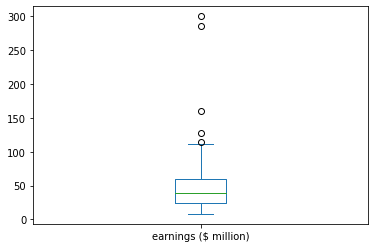

In [52]:
df.plot.box(y='earnings ($ million)');

In [53]:
Q3 = df['earnings ($ million)'].quantile(0.75)
Q1 = df['earnings ($ million)'].quantile(0.25)
IIQ = Q3 - Q1

df[(df['earnings ($ million)'] > (Q3+1.5*IIQ))]

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
171,172,Tiger Woods,USA,1,1,golf,2008,115.0
241,242,Floyd Mayweather,USA,1,1,boxing,2015,300.0
242,243,Manny Pacquiao,Philippines,2,11,boxing,2015,160.0
271,272,Floyd Mayweather,USA,1,>100,boxing,2018,285.0
281,282,Lionel Messi,Argentina,1,2,soccer,2019,127.0


2) Faça um gráfico de linha para verificar os ganhos (earnings) anuais dos atletas

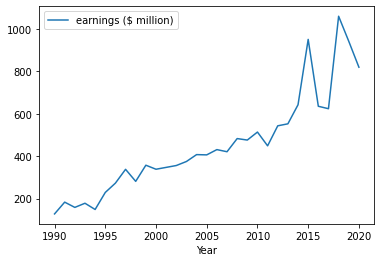

In [56]:
df.pivot_table(index='Year', values='earnings ($ million)', aggfunc='sum').plot(y='earnings ($ million)');

3) Quais são os dois atletas que mais aparecem nos registros do dataframe? Para estes atletas, como está a distribuição anual dos ganhos

In [18]:
max_reg = pd.DataFrame(df.Name.value_counts())
max_reg.head(2)

,Name
Tiger Woods,19
Michael Jordan,19


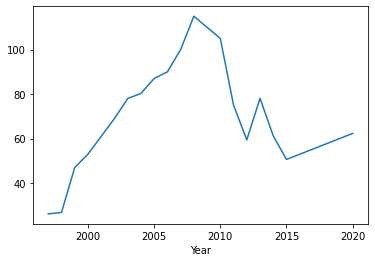

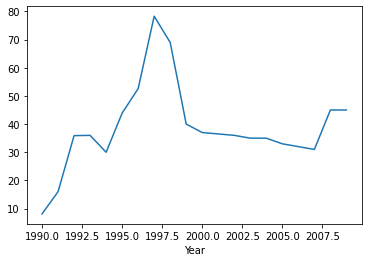

In [19]:
for i in range(2):
    df.loc[df["Name"] == max_reg.index[i]].plot(x = "Year", y = 'earnings ($ million)', legend = None);

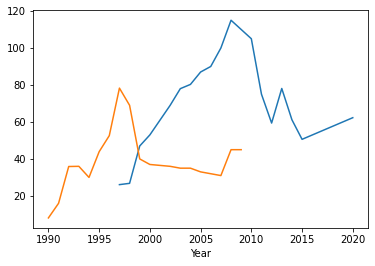

In [20]:
ax1 = df.loc[df["Name"] == max_reg.index[0]].plot(x = "Year", y = 'earnings ($ million)', legend = None)
ax2 = df.loc[df["Name"] == max_reg.index[1]].plot(x = "Year", y = 'earnings ($ million)', legend = None, ax = ax1)

4) Construa um gráfico de **barras horizontais** com os top 15 atletas em **média** de ganhos

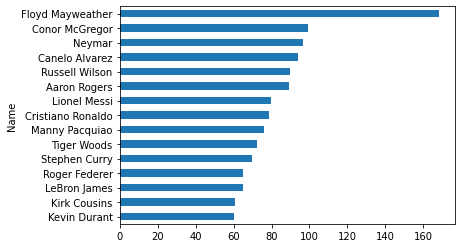

In [21]:
df.groupby(by = 'Name').mean().sort_values(by = 'earnings ($ million)',ascending = False).round(2).iloc[:,3].head(15).plot.barh().invert_yaxis()

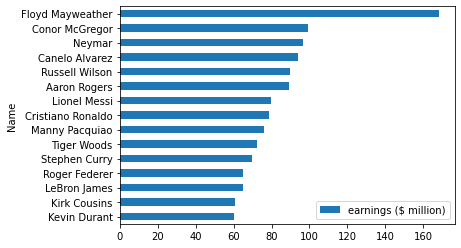

In [65]:
df.groupby(by = 'Name').agg({'earnings ($ million)':'mean'}).nlargest(15,columns = 'earnings ($ million)').plot.barh().invert_yaxis()

5) Gráfico de pizza as contagens dos países

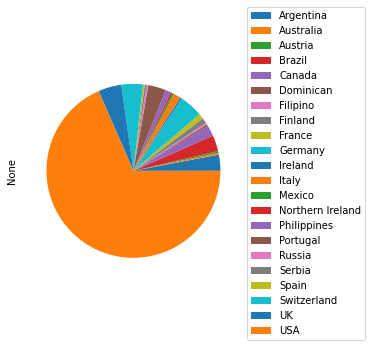

In [69]:
ax = df.groupby(by = 'Nationality').size().plot.pie(labeldistance = None)
ax.legend(loc = 'lower left',bbox_to_anchor = (1,-0.3));
ax.se

6) Dado o gráfico produzido acima construa um gráfico apenas com os países que obtiveram maior quantidade de atletas representados (USA, UK, Germany, Switzerland, Portugal) dos ganhos acumulados por país em função do tempo. Utilize um gráfico de linhas.

In [23]:
# df.plot.line(y = df['earnings ($ million)'].cumsum(), x = 'Year')
df_pais = df.groupby(["Nationality","Year"]).sum().groupby(level=0).cumsum().reset_index()
df_pais
# df_pais.plot(x = 'Year', y = 'earnings ($ million)')


,Nationality,Year,S.NO,Current Rank,earnings ($ million)
0,Argentina,2011,211,10,32.3
1,Argentina,2013,442,20,73.6
2,Argentina,2014,677,24,138.3
3,Argentina,2015,922,28,212.1
4,Argentina,2016,1175,30,293.5
...,...,...,...,...,...
120,USA,2016,22778,996,7100.0
121,USA,2017,24113,1026,7390.7
122,USA,2018,25502,1060,7964.9
123,USA,2019,26947,1100,8377.9


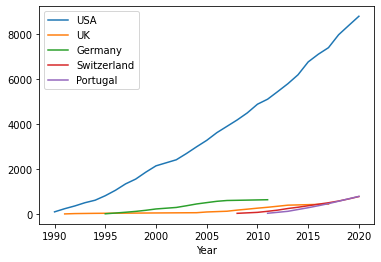

In [24]:
df_pais = df.groupby(["Nationality","Year"]).sum().groupby(level=0).cumsum().reset_index()
paises = ["UK","Germany","Switzerland","Portugal"]
ax1 = df_pais[df_pais.Nationality == "USA"].plot(x = 'Year', y ='earnings ($ million)',label = 'USA')

for pais in paises:
    ax2 = df_pais[df_pais.Nationality == pais].plot(x = 'Year', y ='earnings ($ million)', label = pais, ax = ax1)

7) Faça um gráfico de pizza para verificar qual esporte mais aparece nestas listas

<AxesSubplot:ylabel='None'>

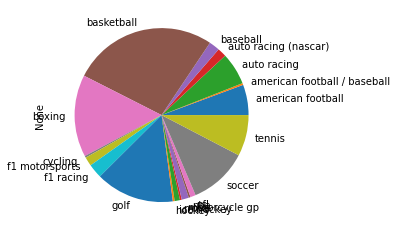

In [39]:
df.groupby(by = 'Sport').size().plot.pie()

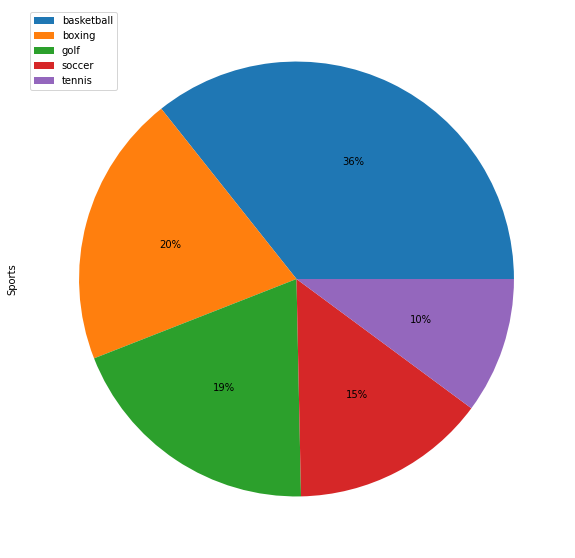

In [70]:
df.groupby('Sport').count().sort_values('Nationality', ascending=False).head(5).plot(y='Nationality', kind='pie', figsize=(10,10), fontsize=10, ylabel= 'Sports' ,labeldistance=None, autopct='%1.0f%%');

In [38]:
df.Sport.unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'tennis', 'nfl',
       'nba', 'baseball', 'ice hockey', 'american football / baseball',
       'f1 motorsports', 'auto racing (nascar)', 'hockey', 'f1 racing',
       'american football', 'soccer', 'cycling', 'motorcycle gp', 'mma'],
      dtype=object)

8) Construa dois gráfico de barras para verificar os ganhos por esporte, sendo o primeiro dos ganhos médios e o segundo da somatória.

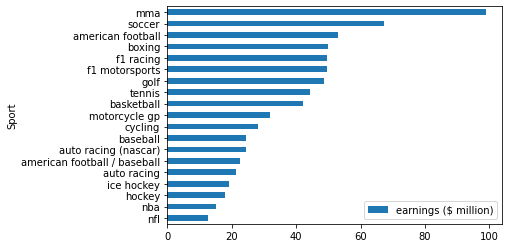

In [50]:
df.groupby(by = 'Sport').agg({"earnings ($ million)":'mean'}).sort_values(by = 'earnings ($ million)',ascending = True).plot.barh();

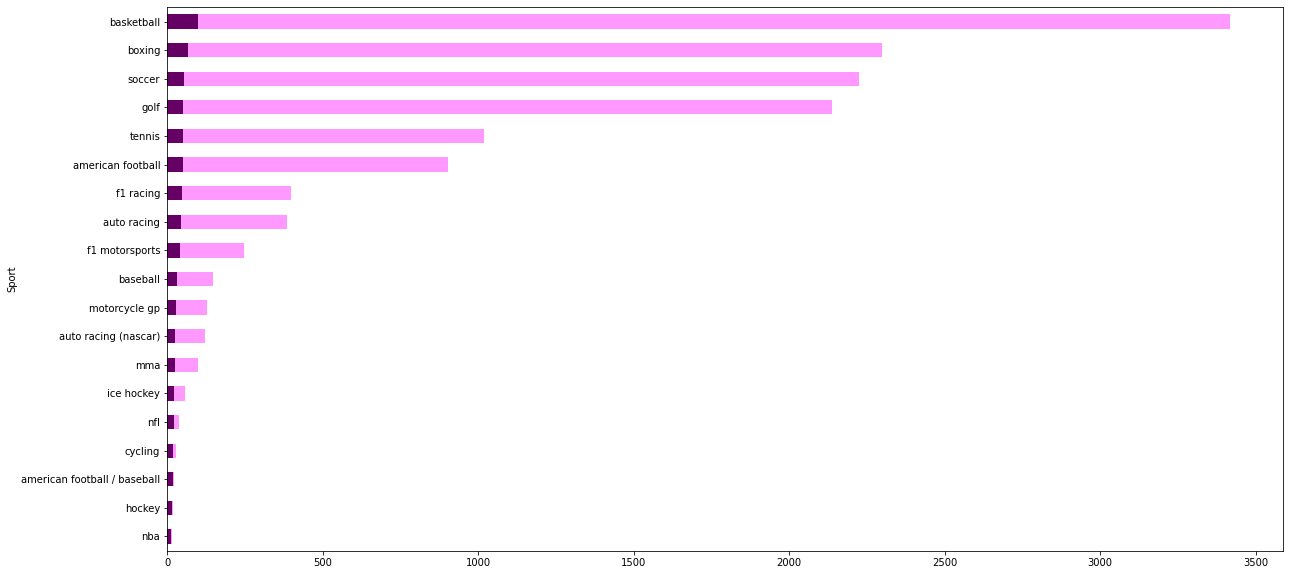

In [71]:
gr1 = df.groupby('Sport').mean()["earnings ($ million)"].sort_values().plot(kind = 'barh', color = 'black', figsize = (20,10))
gr2 = df.groupby('Sport').sum()["earnings ($ million)"].sort_values().plot(kind = 'barh', ax = gr1, color = 'magenta', alpha = 0.4)

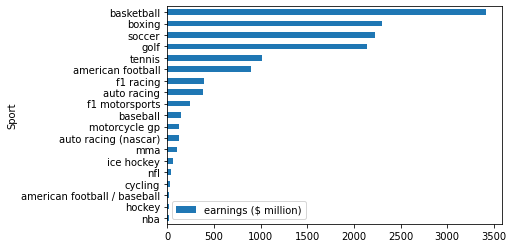

In [51]:
df.groupby(by = 'Sport').agg({"earnings ($ million)":'sum'}).sort_values(by = 'earnings ($ million)',ascending = True).plot.barh();